In [29]:
import os
import os.path as osp

import pandas as pd
import numpy as np

In [30]:
date = "2024-07-29"
df = pd.read_csv(f"data/{date}.csv")
for col in df.columns:
    print(col, df[col].dtype)
print("\nnumber of records", len(df))

record_id object
longitude float64
latitude float64
speed float64
heading int64
navigation_status float64
mmsi int64
ship_type float64
ship_name float64
timestamp object
decode_timestamp object
data_timestamp object
day_id int64
date object
unixstamp float64

number of records 6517


In [31]:
for col in df.columns:
    print(col, df[col].dtype)
print("\nnumber of records", len(df))

record_id object
longitude float64
latitude float64
speed float64
heading int64
navigation_status float64
mmsi int64
ship_type float64
ship_name float64
timestamp object
decode_timestamp object
data_timestamp object
day_id int64
date object
unixstamp float64

number of records 6517


In [32]:
print("number of ships", df["mmsi"].nunique(), df["mmsi"].unique())
dates = [str(x)[:10] for x in df["timestamp"].values]


number of ships 10 [413867644 413837923 413837924 413860512 413848169 413837927 413866992
 413863924 413859423 413841065]


In [33]:
from collections import defaultdict

ship_gis = defaultdict(list)
for mmsi in df["mmsi"].unique():
    filtered_df = df[df["mmsi"] == mmsi]
    mmsi = str(mmsi)
    for idx, row in filtered_df.iterrows():
        ship_gis[mmsi].append(tuple(row[col] for col in ["longitude", "latitude", "unixstamp"]))
    ship_gis[mmsi] = np.array(ship_gis[mmsi])
    ship_gis[mmsi] = ship_gis[mmsi][np.argsort(ship_gis[mmsi][:, 2])] # sort according to the timestamp

In [52]:
import matplotlib
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


# data = ship_gis["413848169"][:500, :2]
data = ship_gis["413837924"][:500, :2]
pred = []
win_len = 4
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

for i in range(len(data) - win_len):
    x_window = data[i:i + win_len, 0]
    y_window = data[i:i + win_len, 1]

    params, _ = curve_fit(quadratic, x_window, y_window)
    a, b, c = params

    x_right = x_window[-1]
    y_right = y_window[-1]

    quadratic(x_right, a, b, c)

    derivative = 2 * a * x_right + b

    step_size = np.mean(np.diff(x_window)) * 50

    x_next = x_right + step_size
    y_next = quadratic(x_next, a, b, c)

    pred.append((x_next, y_next))

pred = np.array(pred)

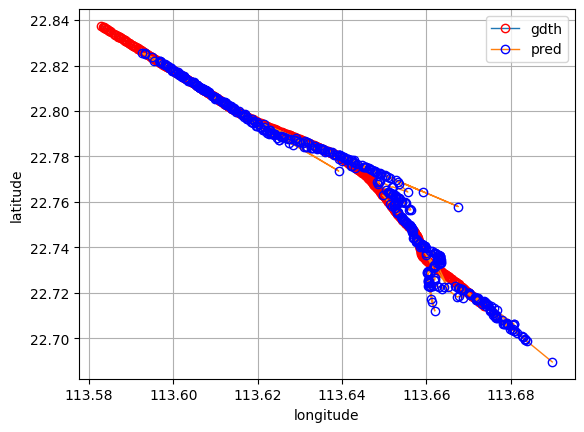

In [53]:
fig = plt.figure()

x1 = data[:, 0]
y1 = data[:, 1]
plt.plot(x1, y1, linestyle='-', linewidth=1, marker='o', markerfacecolor='none', markeredgecolor='red', label="gdth")

x2 = pred[:, 0]
y2 = pred[:, 1]
plt.plot(x2, y2, linestyle='-', linewidth=1, marker='o', markerfacecolor='none', markeredgecolor='blue', label="pred")


plt.grid(True)
plt.legend()

plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()